# 공공데이터 과제 1

## 1. 과거 10년 동안의 대구 날씨 데이터에서 1년 중 일교차가 가장 큰 달은 각각 몇 월인지 그래프로 표시
- 기간: 최근 10년 (2014년 ~	2023년)
- 각 달의 일교차(최고기온 – 최저기온)를 비교하여 각 년도별 일교차가 가장 큰
달을 bar 그래프로 표시
- Pan as	또는 Python	코딩

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [24]:
# 데이터 불러오기 
weatherDF = pd.read_csv("daegu-utf8-df.csv")
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41999 non-null  object 
 1   지점      41999 non-null  int64  
 2   평균기온    41999 non-null  float64
 3   최저기온    41999 non-null  float64
 4   최고기온    41999 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [25]:
# 날짜 형 변환 
weatherDF['날짜']	=	pd.to_datetime(weatherDF['날짜'],	format='%Y-%m-%d')
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41999 non-null  datetime64[ns]
 1   지점      41999 non-null  int64         
 2   평균기온    41999 non-null  float64       
 3   최저기온    41999 non-null  float64       
 4   최고기온    41999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [26]:
weatherDF

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41994,2023-12-27,143,3.8,-0.9,11.3
41995,2023-12-28,143,3.5,-3.0,10.6
41996,2023-12-29,143,3.1,-2.9,9.5
41997,2023-12-30,143,2.9,-2.9,7.7


In [27]:
yearDF = weatherDF[weatherDF["날짜"].dt.year == 2013]
yearDF.insert(loc=0, column='일교차', value=list(yearDF["최고기온"] - yearDF["최저기온"]))
yearDF

,일교차,날짜,지점,평균기온,최저기온,최고기온
37984,12.8,2013-01-01,143,-2.6,-9.1,3.7
37985,8.9,2013-01-02,143,-3.9,-8.4,0.5
37986,6.2,2013-01-03,143,-7.8,-10.4,-4.2
37987,11.6,2013-01-04,143,-5.9,-11.6,0.0
37988,12.4,2013-01-05,143,-3.5,-10.3,2.1
...,...,...,...,...,...,...
38343,6.0,2013-12-27,143,-0.8,-3.2,2.8
38344,7.6,2013-12-28,143,-1.6,-4.7,2.9
38345,8.5,2013-12-29,143,0.2,-4.0,4.5
38346,9.8,2013-12-30,143,3.6,-1.1,8.7


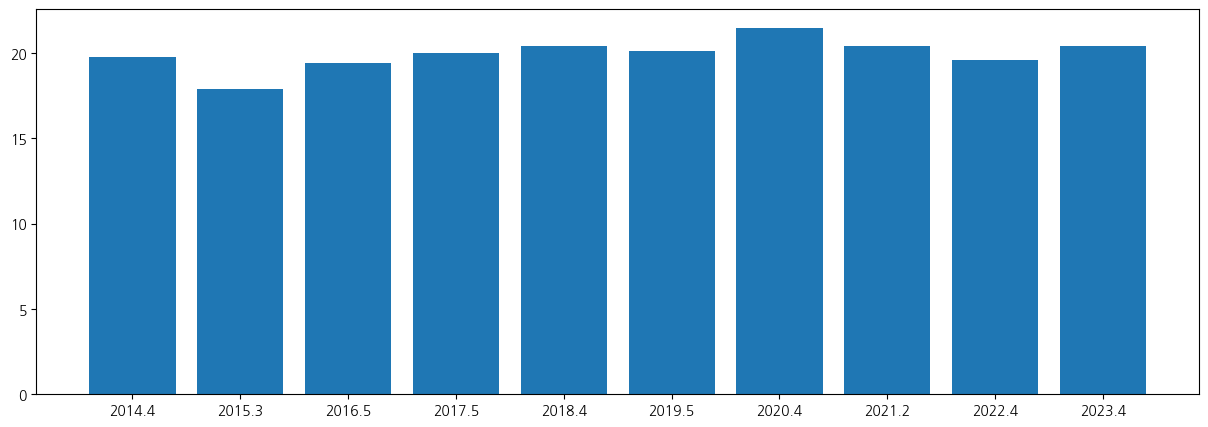

In [31]:
decade_start = 2014
diff_List = [] # y축
YM_List = []  # x축
for year in range(decade_start, decade_start+10):
    yearDF = weatherDF[weatherDF["날짜"].dt.year == year] # 해당 연 걸러줌 

    # 일교차를 구하고 해당 달을 거르
    # yearDF["일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    # yearDF.loc[:]["일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    yearDF.insert(loc=0, column='일교차', value=list(yearDF["최고기온"] - yearDF["최저기온"]))
    diff_List.append(yearDF.sort_values("일교차").tail(1).iloc[0, 0])
    
    m = yearDF.sort_values("일교차").tail(1)["날짜"].dt.month.iloc[0]
    YM_List.append(str(year)+"."+str(m))
     # monthDF = yearDF[monthDF["날짜"].dt.month == month] # 년 + 달 까지 걸러줌
plt.figure(figsize=(15, 5))
plt.bar(YM_List, diff_List)
plt.show()

## <hr> 2. 대구 기온 데이터에서 시작 연도, 마지막 연도를 입력하고 특정 월의 최고 기온 및 최저 기온의 평균값을 구하고 그래프로 표현

In [7]:
# 데이터 불러오기 
weatherDF = pd.read_csv("daegu-utf8-df.csv")
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41999 non-null  object 
 1   지점      41999 non-null  int64  
 2   평균기온    41999 non-null  float64
 3   최저기온    41999 non-null  float64
 4   최고기온    41999 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [8]:
# 날짜 형 변환 
weatherDF['날짜'] = pd.to_datetime(weatherDF['날짜'], format='%Y-%m-%d')
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41999 non-null  datetime64[ns]
 1   지점      41999 non-null  int64         
 2   평균기온    41999 non-null  float64       
 3   최저기온    41999 non-null  float64       
 4   최고기온    41999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [20]:
# 일단은 고정
'''
start_year = 2014
last_year = 2023
want_month = 12
''' 
start_year = int(input("시작 연도를 입력하세요: "))
last_year = int(input("마지막 연도를 입력하세요: "))
want_month = int(input("기온 변화를 측정할 달을 입력하세요: "))

시작 연도를 입력하세요:  2001
마지막 연도를 입력하세요:  2023
기온 변화를 측정할 달을 입력하세요:  8


### 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산

In [21]:
# 년부터 걸러줌 
year_mask_DF = weatherDF[weatherDF["날짜"].dt.year.between(start_year, last_year)]

In [22]:
# 월도 걸러줌
filtered_DF = year_mask_DF[year_mask_DF["날짜"].dt.month == want_month]
filtered_DF

,날짜,지점,평균기온,최저기온,최고기온
33813,2001-08-01,143,30.0,27.0,34.1
33814,2001-08-02,143,30.6,27.2,35.1
33815,2001-08-03,143,30.9,27.8,35.5
33816,2001-08-04,143,30.3,27.1,34.8
33817,2001-08-05,143,28.6,25.5,31.4
...,...,...,...,...,...
41872,2023-08-27,143,25.5,22.3,30.9
41873,2023-08-28,143,25.5,23.0,27.9
41874,2023-08-29,143,25.7,23.2,28.0
41875,2023-08-30,143,24.7,22.3,25.9


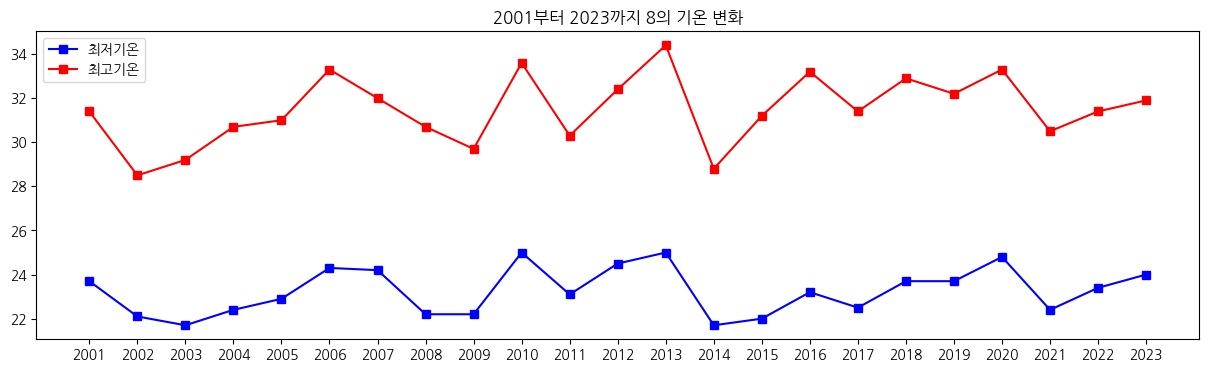

2001부터 2023까지 8의 기온 변화
8 최저기온 평균:
23.7 22.1 21.7 22.4 22.9 24.3 24.2 22.2 22.2 25.0 23.1 24.5 25.0 21.7 22.0 23.2 22.5 23.7 23.7 24.8 22.4 23.4 24.0 
8 최고기온 평균:
31.4 28.5 29.2 30.7 31.0 33.3 32.0 30.7 29.7 33.6 30.3 32.4 34.4 28.8 31.2 33.2 31.4 32.9 32.2 33.3 30.5 31.4 31.9 

In [23]:
high = []
low = []
x = [i for i in range(start_year, last_year+1)]
filtered_DF = weatherDF[weatherDF["날짜"].dt.month == want_month]
for year in range(start_year, last_year+1):
    yearDF = filtered_DF[filtered_DF["날짜"].dt.year == year]
    high.append(round(yearDF["최고기온"].mean(), 1))
    low.append(round(yearDF["최저기온"].mean(), 1))

plt.figure(figsize=(15, 4))
plt.plot(x, low, "b-s" ,label = "최저기온")
plt.plot(x, high, "r-s", label = "최고기온")
plt.title(f"{start_year}부터 {last_year}까지 {want_month}의 기온 변화")
plt.legend(loc = 'upper left')
plt.xticks(x, x)
plt.show()
print(f"{start_year}부터 {last_year}까지 {want_month}의 기온 변화")
print(f"{want_month} 최저기온 평균:")
for i in low:
    print(i, end=" ")
print()
print(f"{want_month} 최고기온 평균:")
for i in high:
    print(i, end=" ")